<a href="https://colab.research.google.com/github/test-tlib/UMAM-DS-INTERN-PROJECTS/blob/main/UMAM_Netflix_Data_(project_1)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Loading and Inspection

In [ ]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

data = pd.read_csv('netflix1.csv')
data.head()




,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


Handling Null Values

In [ ]:



print(data.isnull().sum())





show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


Removing Duplicates

In [ ]:
data.drop_duplicates(inplace=True)
print("After removing duplicates:")
print(data.shape)
data.head()


After removing duplicates:
(8790, 10)


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


Dropping Unneeded Columns

In [ ]:

print("Before:", data.shape)
print("Missing in 'director':", data['director'].isnull().sum())
data.dropna(subset=['director'], inplace=True)
print("After:", data.shape)
print("Missing in 'director':", data['director'].isnull().sum())



Before: (8790, 10)
Missing in 'director': 0
After: (8790, 10)
Missing in 'director': 0


Converting Data Types

In [ ]:

data['date_added'] = pd.to_datetime(data['date_added'], format='mixed')
print(data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


Content Type Distribution

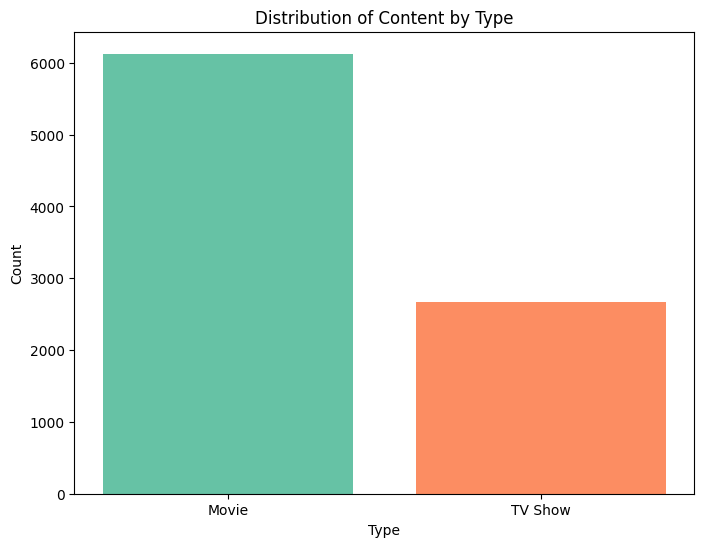

In [ ]:

type_counts = data['type'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(type_counts.index, type_counts.values, color=sns.color_palette('Set2'))

plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()



Most Common Genres

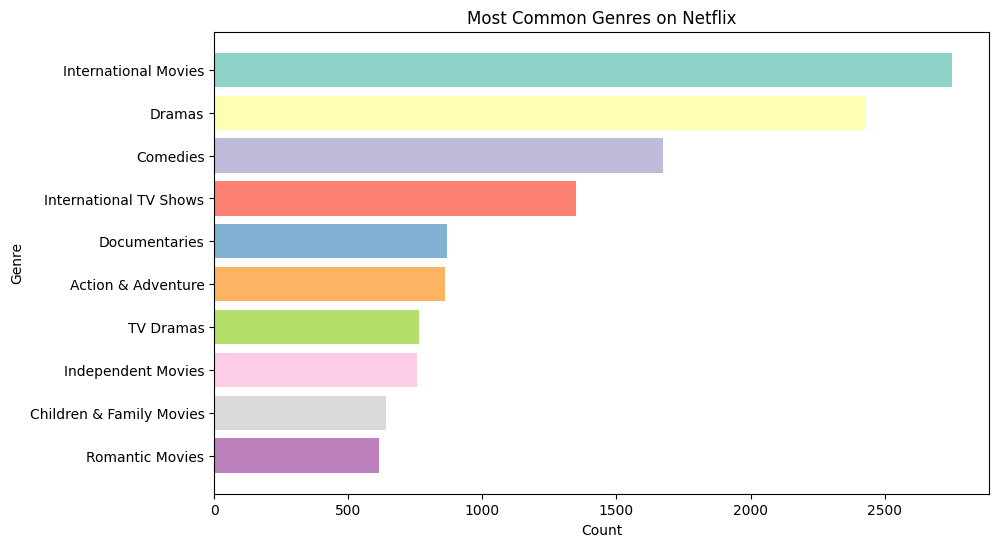

In [ ]:

data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10).reset_index()
genre_counts.columns = ['Genre', 'Count']


plt.figure(figsize=(10, 6))
colors = sns.color_palette("Set3", len(genre_counts))
plt.barh(genre_counts['Genre'], genre_counts['Count'], color=colors)
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.gca().invert_yaxis()
plt.show()




Content Added Over Time

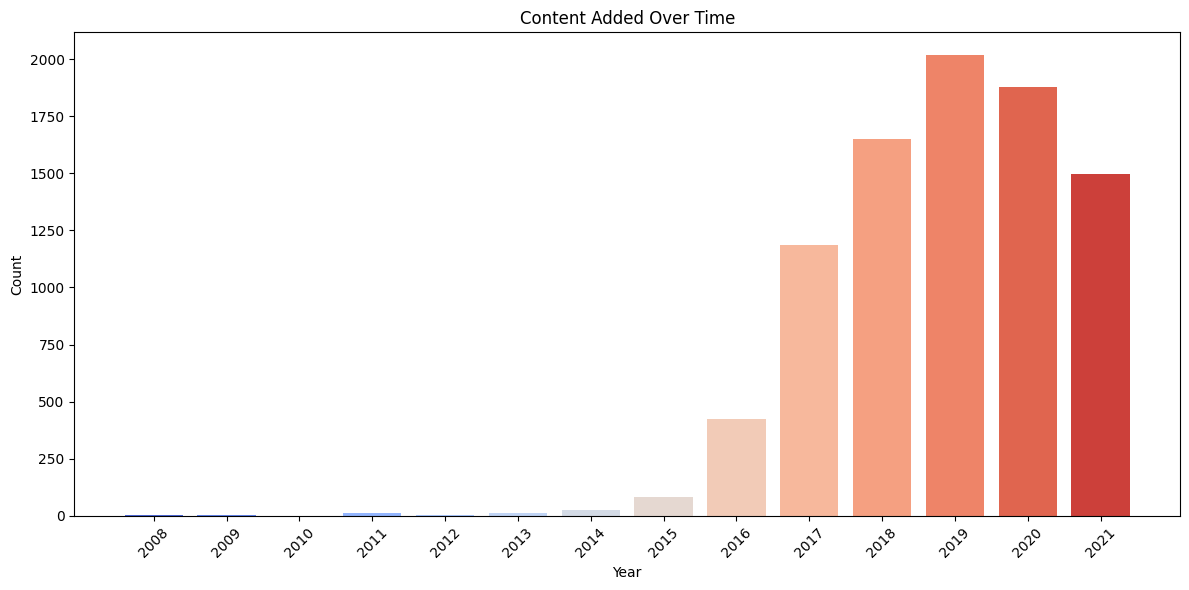

In [ ]:

year_counts = data['year_added'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
colors = sns.color_palette("coolwarm", n_colors=len(year_counts))

plt.bar(x=year_counts.index.astype(str), height=year_counts.values, color=colors)
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TOP 10 DIRECTORS WITH MOST TITLES

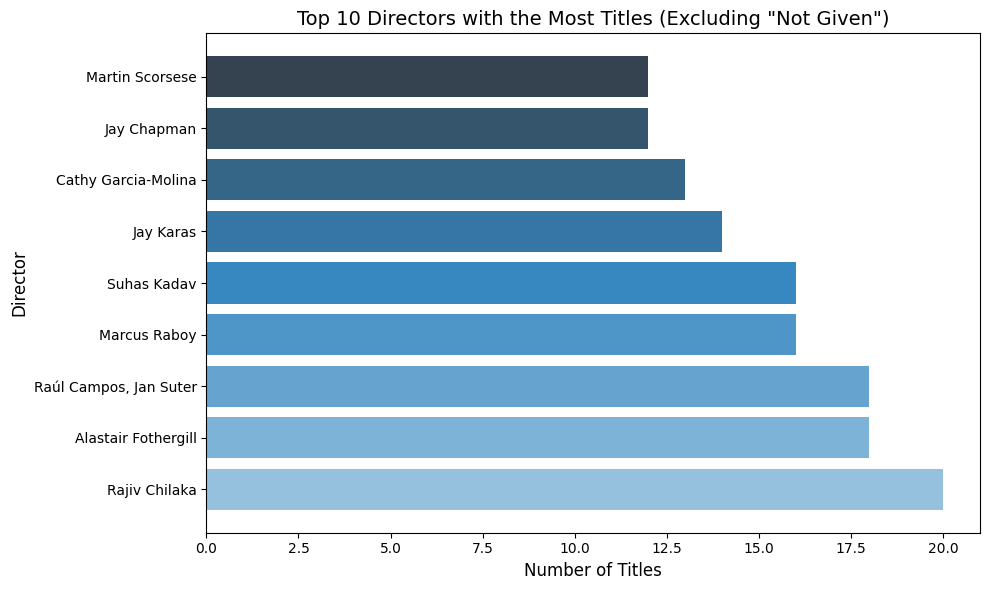

In [ ]:

filtered_directors = top_directors[top_directors.index != 'Not Given']


plt.figure(figsize=(10, 6))
colors = sns.color_palette('Blues_d', n_colors=len(filtered_directors))

plt.barh(y=filtered_directors.index, width=filtered_directors.values, color=colors)
plt.title('Top 10 Directors with the Most Titles (Excluding "Not Given")', fontsize=14)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.tight_layout()
plt.show()



Word Cloud of Movie Titles

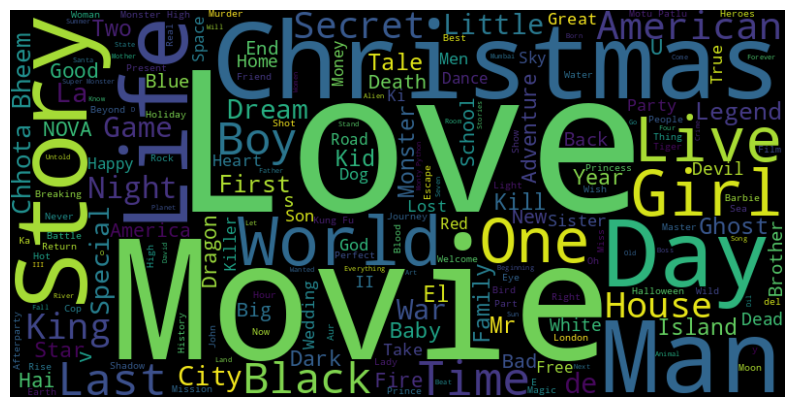

In [ ]:
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400,
background_color='black').generate(' '.join(movie_titles))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Total content on Netflix

Text(0.5, 0.98, 'Total Content on Netflix')

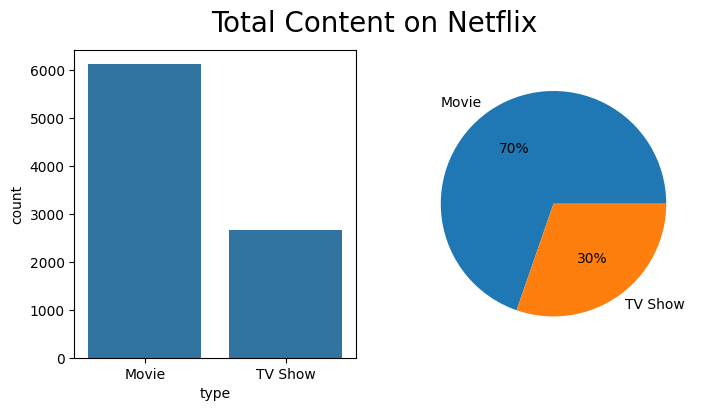

In [ ]:
freq=data['type'].value_counts()
fig, axes=plt.subplots(1,2, figsize=(8, 4))
sns.countplot(data, x=data['type'], ax=axes[0])
plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)


Distribution of Content Ratings on Netflix

In [ ]:
data['rating'].value_counts()


,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


Rating Distribution

Text(0.5, 0.98, 'Rating on Netflix')

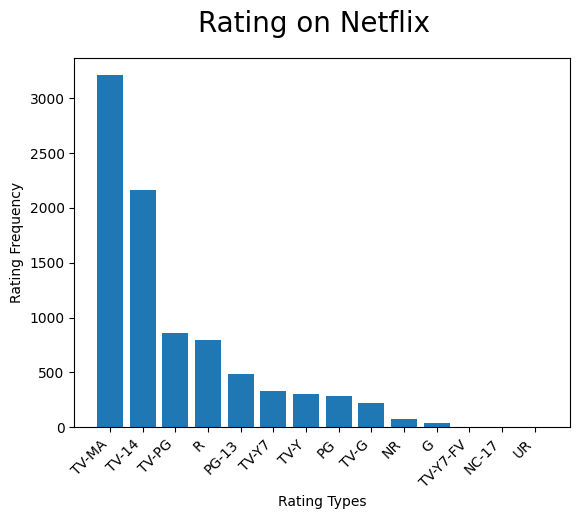

In [ ]:
ratings=data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)
plt.bar(ratings['rating'], ratings['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.suptitle('Rating on Netflix', fontsize=20)

Text(0.5, 0.98, 'Rating on Netflix')

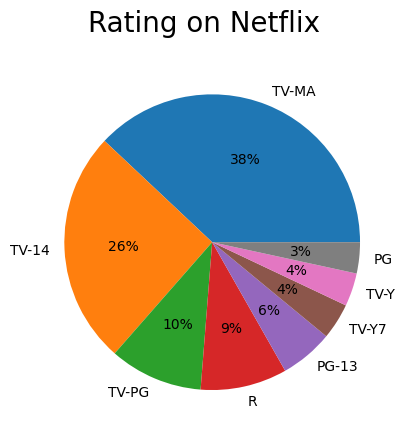

In [ ]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8],autopct='%.0f%%')
plt.suptitle('Rating on Netflix', fontsize=20)

Distribution of Netflix Content by Country

In [ ]:
data['country'].value_counts()

,count
country,
United States,3240
India,1057
United Kingdom,638
Pakistan,421
Not Given,287
...,...
Luxembourg,1
Senegal,1
Belarus,1


Top Countries by Content

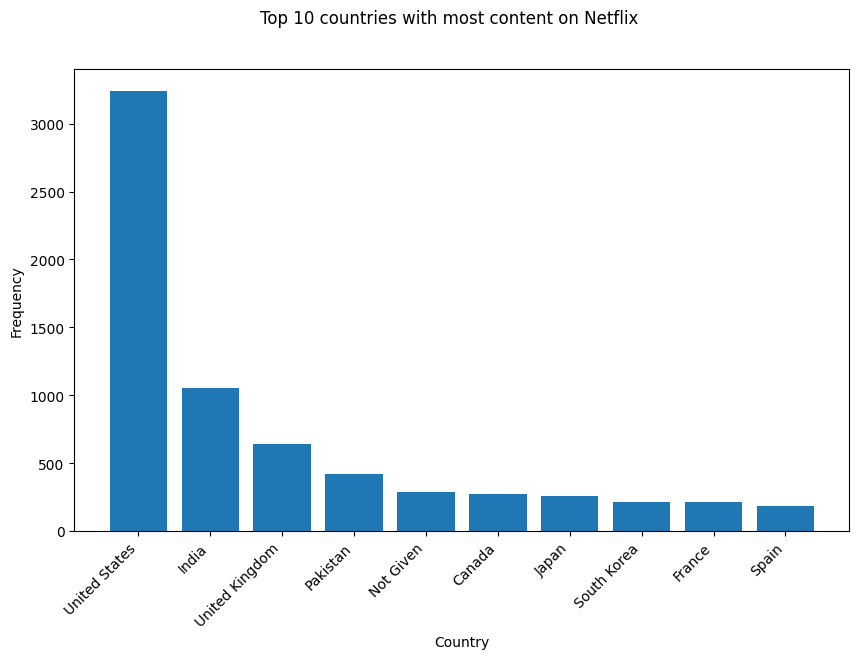

In [ ]:
top_ten_countries=data['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]
plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries['country'],
top_ten_countries['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 countries with most content on Netflix")
plt.show()

In [ ]:
data['year']=data['date_added'].dt.year
data['month']=data['date_added'].dt.month
data['day']=data['date_added'].dt.day

Monthly Releases

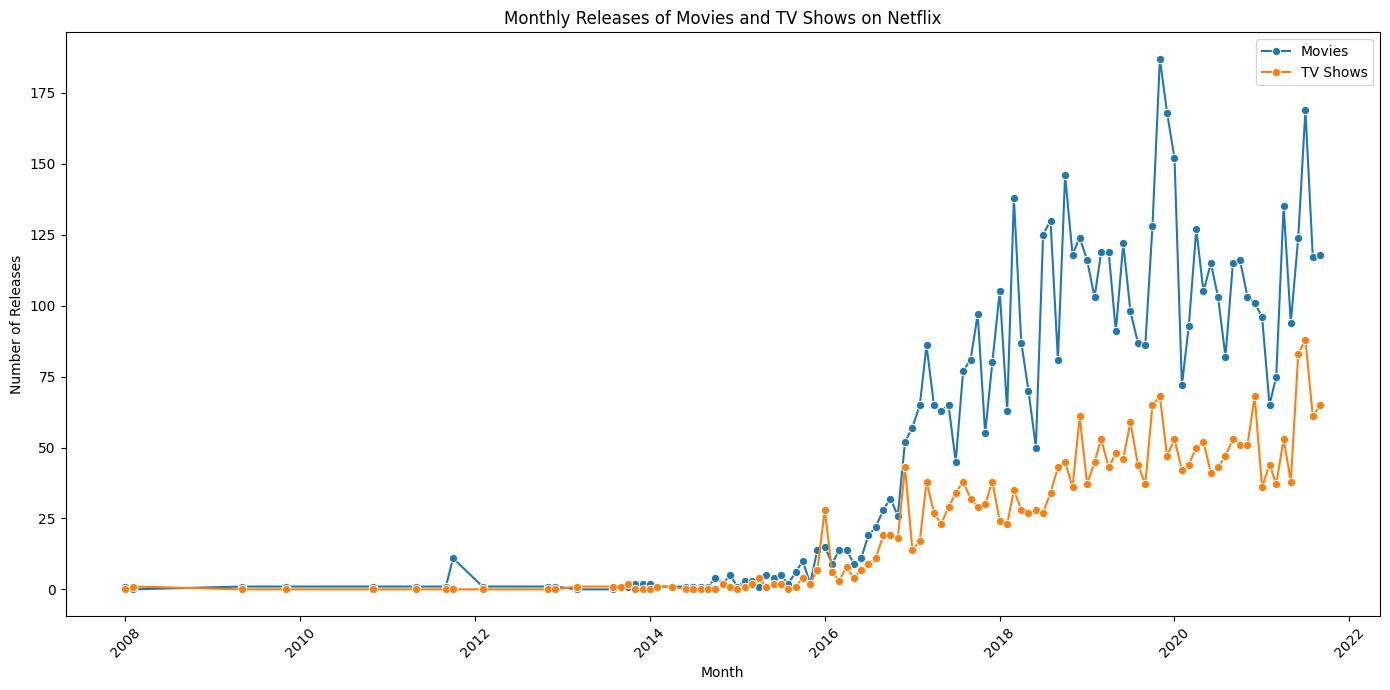

In [ ]:

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_counts, x='month_year', y='Movie', label='Movies', marker='o')
sns.lineplot(data=monthly_counts, x='month_year', y='TV Show', label='TV Shows', marker='o')
plt.title('Monthly Releases of Movies and TV Shows on Netflix')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Yearly releases

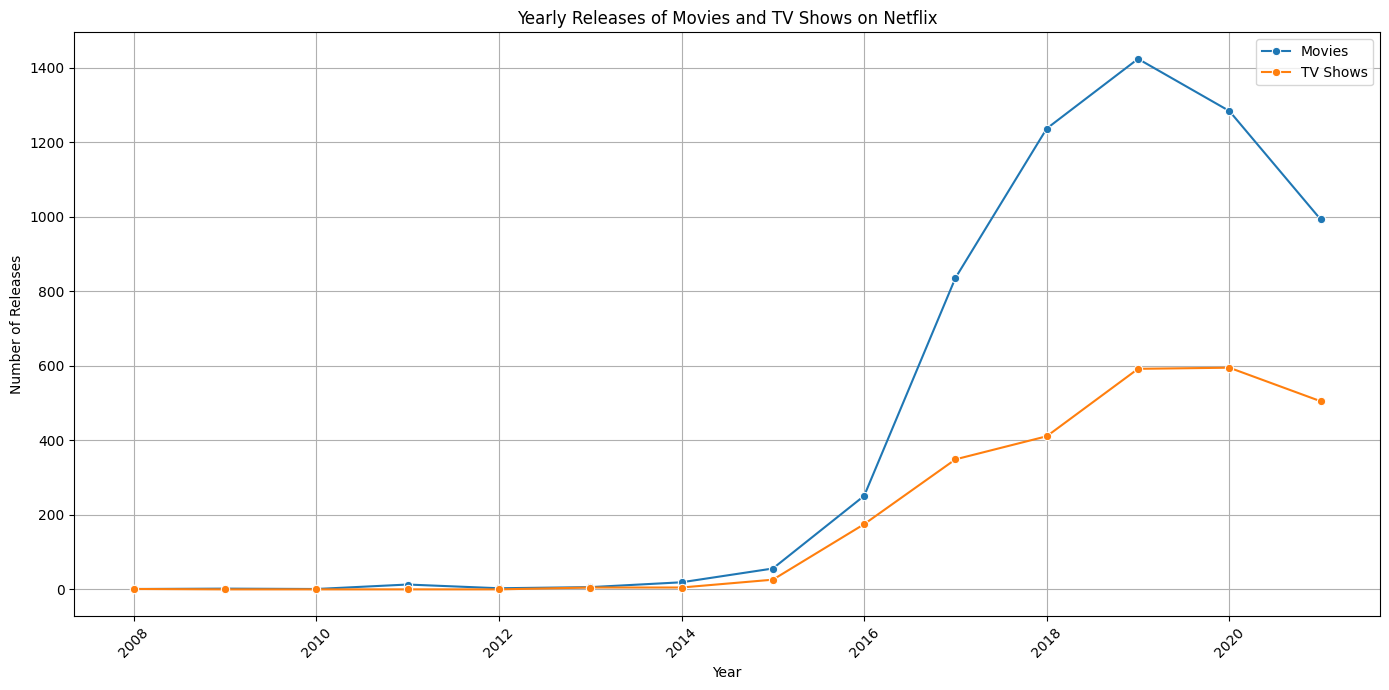

In [ ]:

plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_counts, x=yearly_counts.index, y='Movie', label='Movies', marker='o')
sns.lineplot(data=yearly_counts, x=yearly_counts.index, y='TV Show', label='TV Shows', marker='o')
plt.title('Yearly Releases of Movies and TV Shows on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Popular genres of movies on Netflix

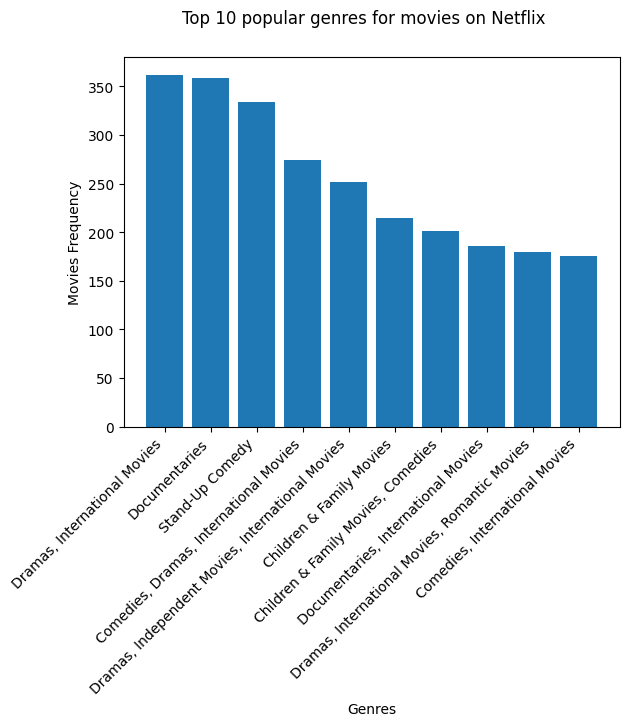

In [ ]:
popular_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=data[data['type']=='TVShow'].groupby("listed_in").size().sort_values(ascending=False)[:10]
plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()

Popular genres of shows on Netflix:

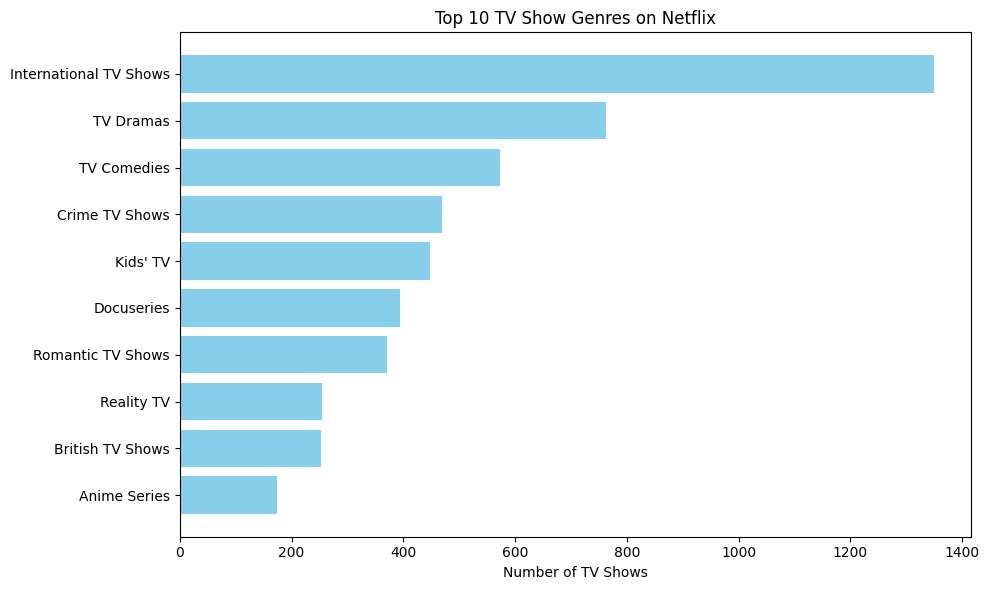

In [ ]:



tv_shows = data[data['type'] == 'TV Show']


tv_genres = tv_shows['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in tv_genres for genre in sublist]


genre_counts = pd.Series(flat_genres).value_counts().head(10)


plt.figure(figsize=(10, 6))
plt.barh(genre_counts.index[::-1], genre_counts.values[::-1], color='skyblue')
plt.xlabel("Number of TV Shows")
plt.title("Top 10 TV Show Genres on Netflix")
plt.tight_layout()
plt.show()


Top 15 Directors with the Most TV Shows on Netflix

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Alastair Fothergill'),
  Text(2, 0, 'Raúl Campos, Jan Suter'),
  Text(3, 0, 'Marcus Raboy'),
  Text(4, 0, 'Suhas Kadav'),
  Text(5, 0, 'Jay Karas'),
  Text(6, 0, 'Cathy Garcia-Molina'),
  Text(7, 0, 'Youssef Chahine'),
  Text(8, 0, 'Jay Chapman'),
  Text(9, 0, 'Martin Scorsese'),
  Text(10, 0, 'Steven Spielberg'),
  Text(11, 0, 'Mark Thornton, Todd Kauffman'),
  Text(12, 0, 'Don Michael Paul'),
  Text(13, 0, 'David Dhawan')])

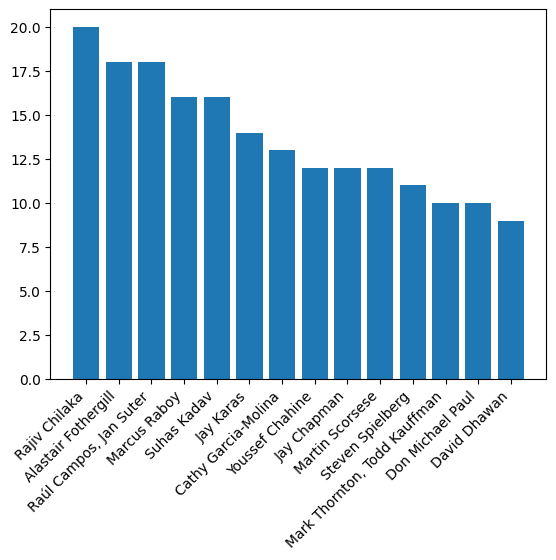

In [ ]:
directors=data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]
plt.bar(directors['director'], directors['count'])
plt.xticks(rotation=45, ha='right')

In [ ]:
!pip install plotly scikit-learn

Feature Engineering

In [ ]:

data['num_genres'] = data['listed_in'].apply(lambda x: len(str(x).split(', ')))


def extract_duration(value):
    try:
        if 'min' in value:
            return int(value.replace(' min', ''))
        elif 'Season' in value:
            return int(value.split(' ')[0]) * 60
        else:
            return None
    except:
        return None

data['duration_mins'] = data['duration'].apply(extract_duration)

data = data.dropna(subset=['title', 'listed_in'])


data[['title', 'listed_in', 'num_genres', 'duration', 'duration_mins']].head(10)

,title,listed_in,num_genres,duration,duration_mins
0,Dick Johnson Is Dead,Documentaries,1,90 min,90
1,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",3,1 Season,60
2,Midnight Mass,"TV Dramas, TV Horror, TV Mysteries",3,1 Season,60
3,Confessions of an Invisible Girl,"Children & Family Movies, Comedies",2,91 min,91
4,Sankofa,"Dramas, Independent Movies, International Movies",3,125 min,125
5,The Great British Baking Show,"British TV Shows, Reality TV",2,9 Seasons,540
6,The Starling,"Comedies, Dramas",2,104 min,104
7,Motu Patlu in the Game of Zones,"Children & Family Movies, Comedies, Music & Mu...",3,87 min,87
8,Je Suis Karl,"Dramas, International Movies",2,127 min,127
9,Motu Patlu in Wonderland,"Children & Family Movies, Music & Musicals",2,76 min,76


	Machine Learning

In [ ]:
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['listed_in'])


cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


def get_recommendations(title, cosine_sim=cosine_sim):
    try:
        idx = data[data['title'].str.lower() == title.lower()].index[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:6]
        movie_indices = [i[0] for i in sim_scores]
        return data[['title', 'listed_in']].iloc[movie_indices]
    except IndexError:
        return f"'{title}' not found in the dataset."


get_recommendations("Narcos")


,title,listed_in
7219,Queen of the South,"Crime TV Shows, TV Action & Adventure, TV Dramas"
7342,Altered Carbon,"Crime TV Shows, TV Action & Adventure, TV Dramas"
7356,Narcos: Mexico,"Crime TV Shows, TV Action & Adventure, TV Dramas"
7656,Shooter,"Crime TV Shows, TV Action & Adventure, TV Dramas"
7670,Marvel's Jessica Jones,"Crime TV Shows, TV Action & Adventure, TV Dramas"


Advanced Visualization

In [ ]:

all_genres = data['listed_in'].str.split(', ').explode()
top_genres = all_genres.value_counts().head(10).reset_index()
top_genres.columns = ['Genre', 'Count']


fig = px.bar(top_genres, x='Genre', y='Count', title='Top 10 Netflix Genres', color='Count')
fig.show()